<a href="https://colab.research.google.com/github/Jsims398/CS-180-BYU-Projects/blob/main/JS_data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [ ]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

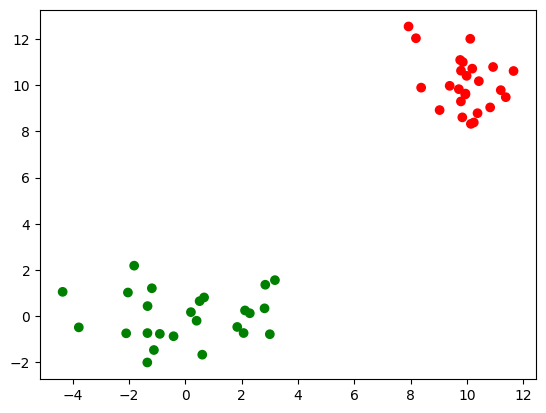

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets.

### Algorithms:
#### K-means
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan:

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM:

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:


Explain how K-Means works?

over repeated updates it attempts to minimize the sum of the squared distance between the data points to the cluser assigned centroids.

Explain how DBScan works?

This scan works to group items together within a set distance from each other. Ignoring outliers and creating as many groups as needed for odd shapes too.

Explain how GMM works?

This model gives all data points a percentage that it could belong to a cluster based on the Gaussian distributions based on means, covariances, and coefficients. It then updates the the Guassian distributions and reassigns until the parameters stabilize.

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task:
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


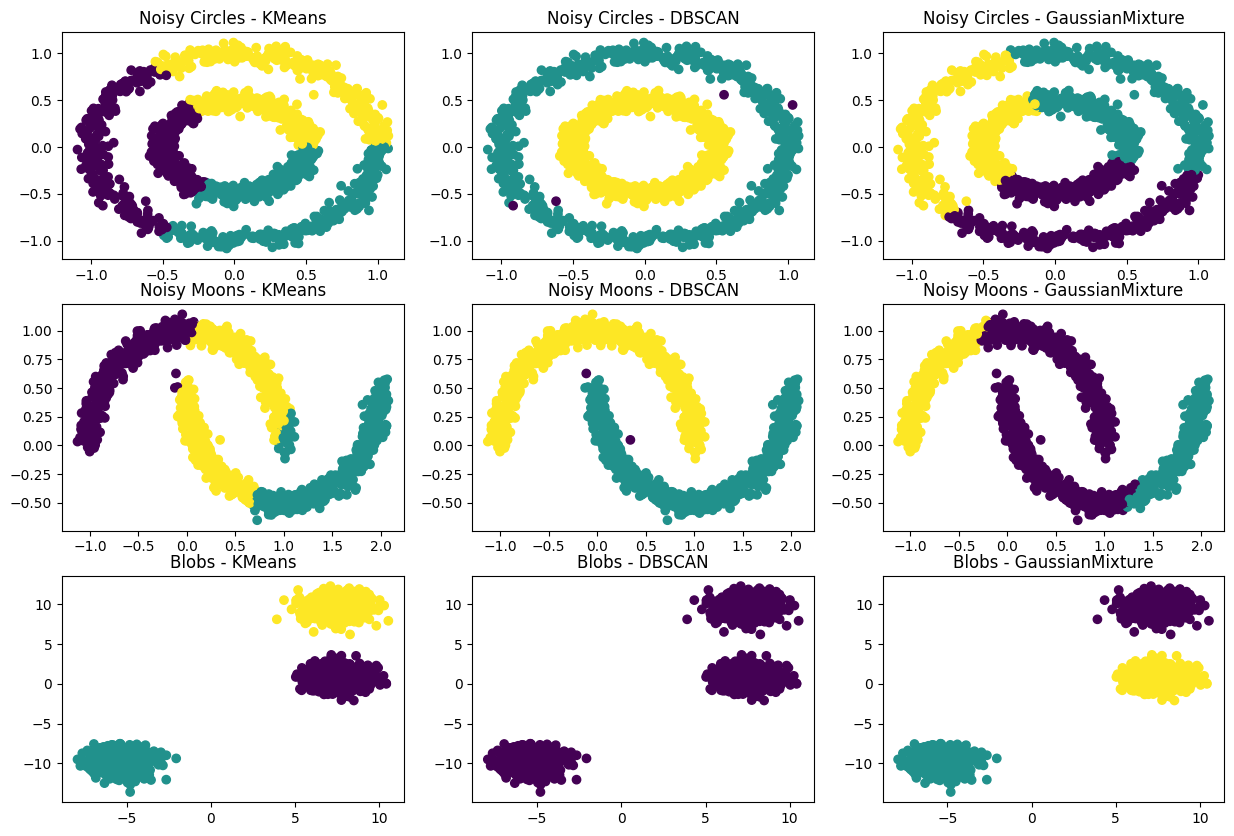

In [ ]:
#Enter the code for exercise 1 here
datasets_list = [noisy_circles, noisy_moons, blobs]
dataset_names = ['Noisy Circles', 'Noisy Moons', 'Blobs']
algorithms = [KMeans(n_clusters=3), DBSCAN(eps=0.1, min_samples=8), GaussianMixture(n_components=3)]

fig, axes = plt.subplots(nrows=len(datasets_list), ncols=len(algorithms), figsize=(15, 10))

for i, dataset in enumerate(datasets_list):
    for j, algorithm in enumerate(algorithms):
        clusters = algorithm.fit_predict(dataset)

        ax = axes[i, j] if len(datasets_list) > 1 else axes[j]
        ax.scatter(dataset[:, 0], dataset[:, 1], c=clusters, cmap='viridis')
        ax.set_title(f'{dataset_names[i]} - {algorithm.__class__.__name__}')


plt.show()

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [ ]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task:
* Train K-means on the iris dataset with 3 clusters

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

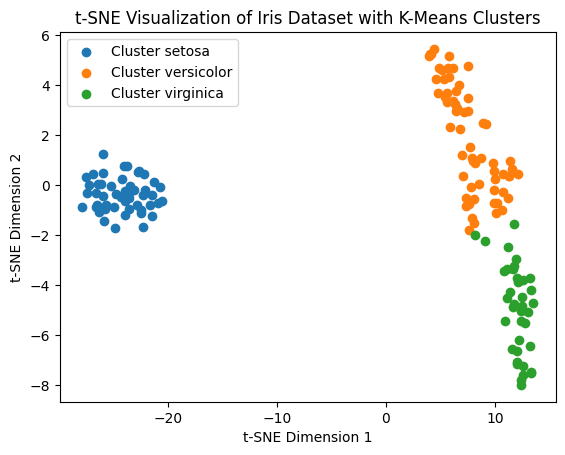

In [ ]:
# clusters = KMeans(n_clusters = 3).fit_predict(X)
# plt.scatter(X_reduced[:,0], X_reduced[:,1], c = clusters)

cluster_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

for cluster_id, class_name in cluster_names.items():
    plt.scatter(X_reduced[clusters == cluster_id, 0],
                X_reduced[clusters == cluster_id, 1],
                label=f'Cluster {class_name}')

plt.title('t-SNE Visualization of Iris Dataset with K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


Comment on your observations. Were we successfully able to group samples together without labels?

We were parcialy able to group items together. Cluster setosa and virginica both share a dimension which could make it harder to decide what group they are in.

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Report the number of samples in the train and test sets
print(f"Number of samples in the training set: {X_train.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")

Number of samples in the training set: 112
Number of samples in the test set: 38


What is the number of samples in the train set?

38

What is the number of samples in the test set?

112

## Exercise 4: K Nearest Neighbors

Your Task:
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



train 0.9642857142857143
test 0.9473684210526315


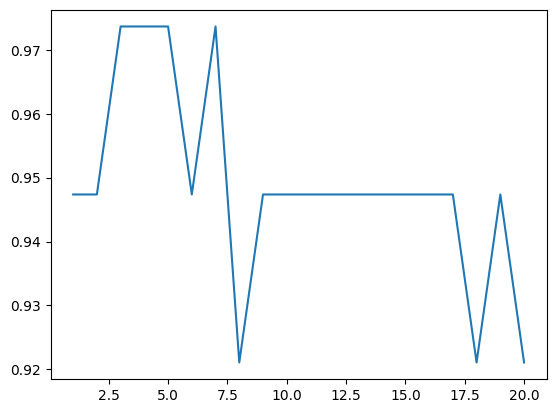

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

print("train", accuracy_score(y_train, knn.predict(X_train)))
print("test", accuracy_score(y_test, y_prediction))

plt.plot(range(1,21), [KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train).score(X_test, y_test) for i in range(1, 21)], label= "test accuracy")


What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

train 0.9732142857142857,
test 0.9736842105263158

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

the score for both train and test accuracy decreases which makes sense due to the fact that it has to consider more neighbors as it predicts the values of each point. It might over look patterns and details in the data.

Train Accuracy (n_neighbors=5): 0.9732
Test Accuracy (n_neighbors=5): 0.9737


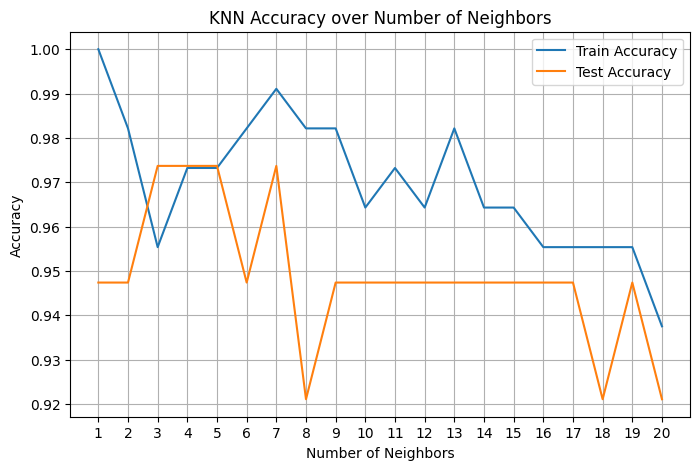

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Train KNN when n_neighbors is 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Report train accuracy and test accuracy for n_neighbors=5
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"Train Accuracy (n_neighbors=5): {train_accuracy:.4f}")
print(f"Test Accuracy (n_neighbors=5): {test_accuracy:.4f}")

# Perform grid search over the parameter n_neighbors in the range 1-20
neighbors = range(1, 21)
train_accuracies = []
test_accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Create a plot showing test/train accuracy over n_neighbors
plt.figure(figsize=(8, 5))
plt.plot(neighbors, train_accuracies, label='Train Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.title('KNN Accuracy over Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(neighbors)
plt.grid(True)
plt.show()